<a href="https://colab.research.google.com/github/Lazuardi-hrp/Mold-Bread-Detection-YOLOv8/blob/main/Code/Projek_Fiskom_YOLOv8_mold_bread_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [ ]:
from ultralytics import YOLO, checks
from IPython.display import display, Image
from IPython import display
display.clear_output()
checks()

Ultralytics YOLOv8.0.193 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/107.7 GB disk)


## Train YOLOv8 Model on Custom Dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
!pip install roboflow --quiet
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="H8h5z8Miqwok3DUUAILH")
project = rf.workspace("muhammad-lazuardi-harahap").project("detection-mold-on-bread")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 810.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.193, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Detection-mold-on-bread--1 in yolov8:: 100%|██████████| 258/258 [00:00<00:00, 6208.29it/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

/content
100% 49.7M/49.7M [00:00<00:00, 185MB/s]
Ultralytics YOLOv8.0.193 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/Detection-mold-on-bread--1/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=No

In [ ]:
!ls  {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1696513106.1bcc15278ac8.1241.0  train_batch20.jpg
F1_curve.png					    train_batch21.jpg
labels_correlogram.jpg				    train_batch22.jpg
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    weights
results.csv


/content


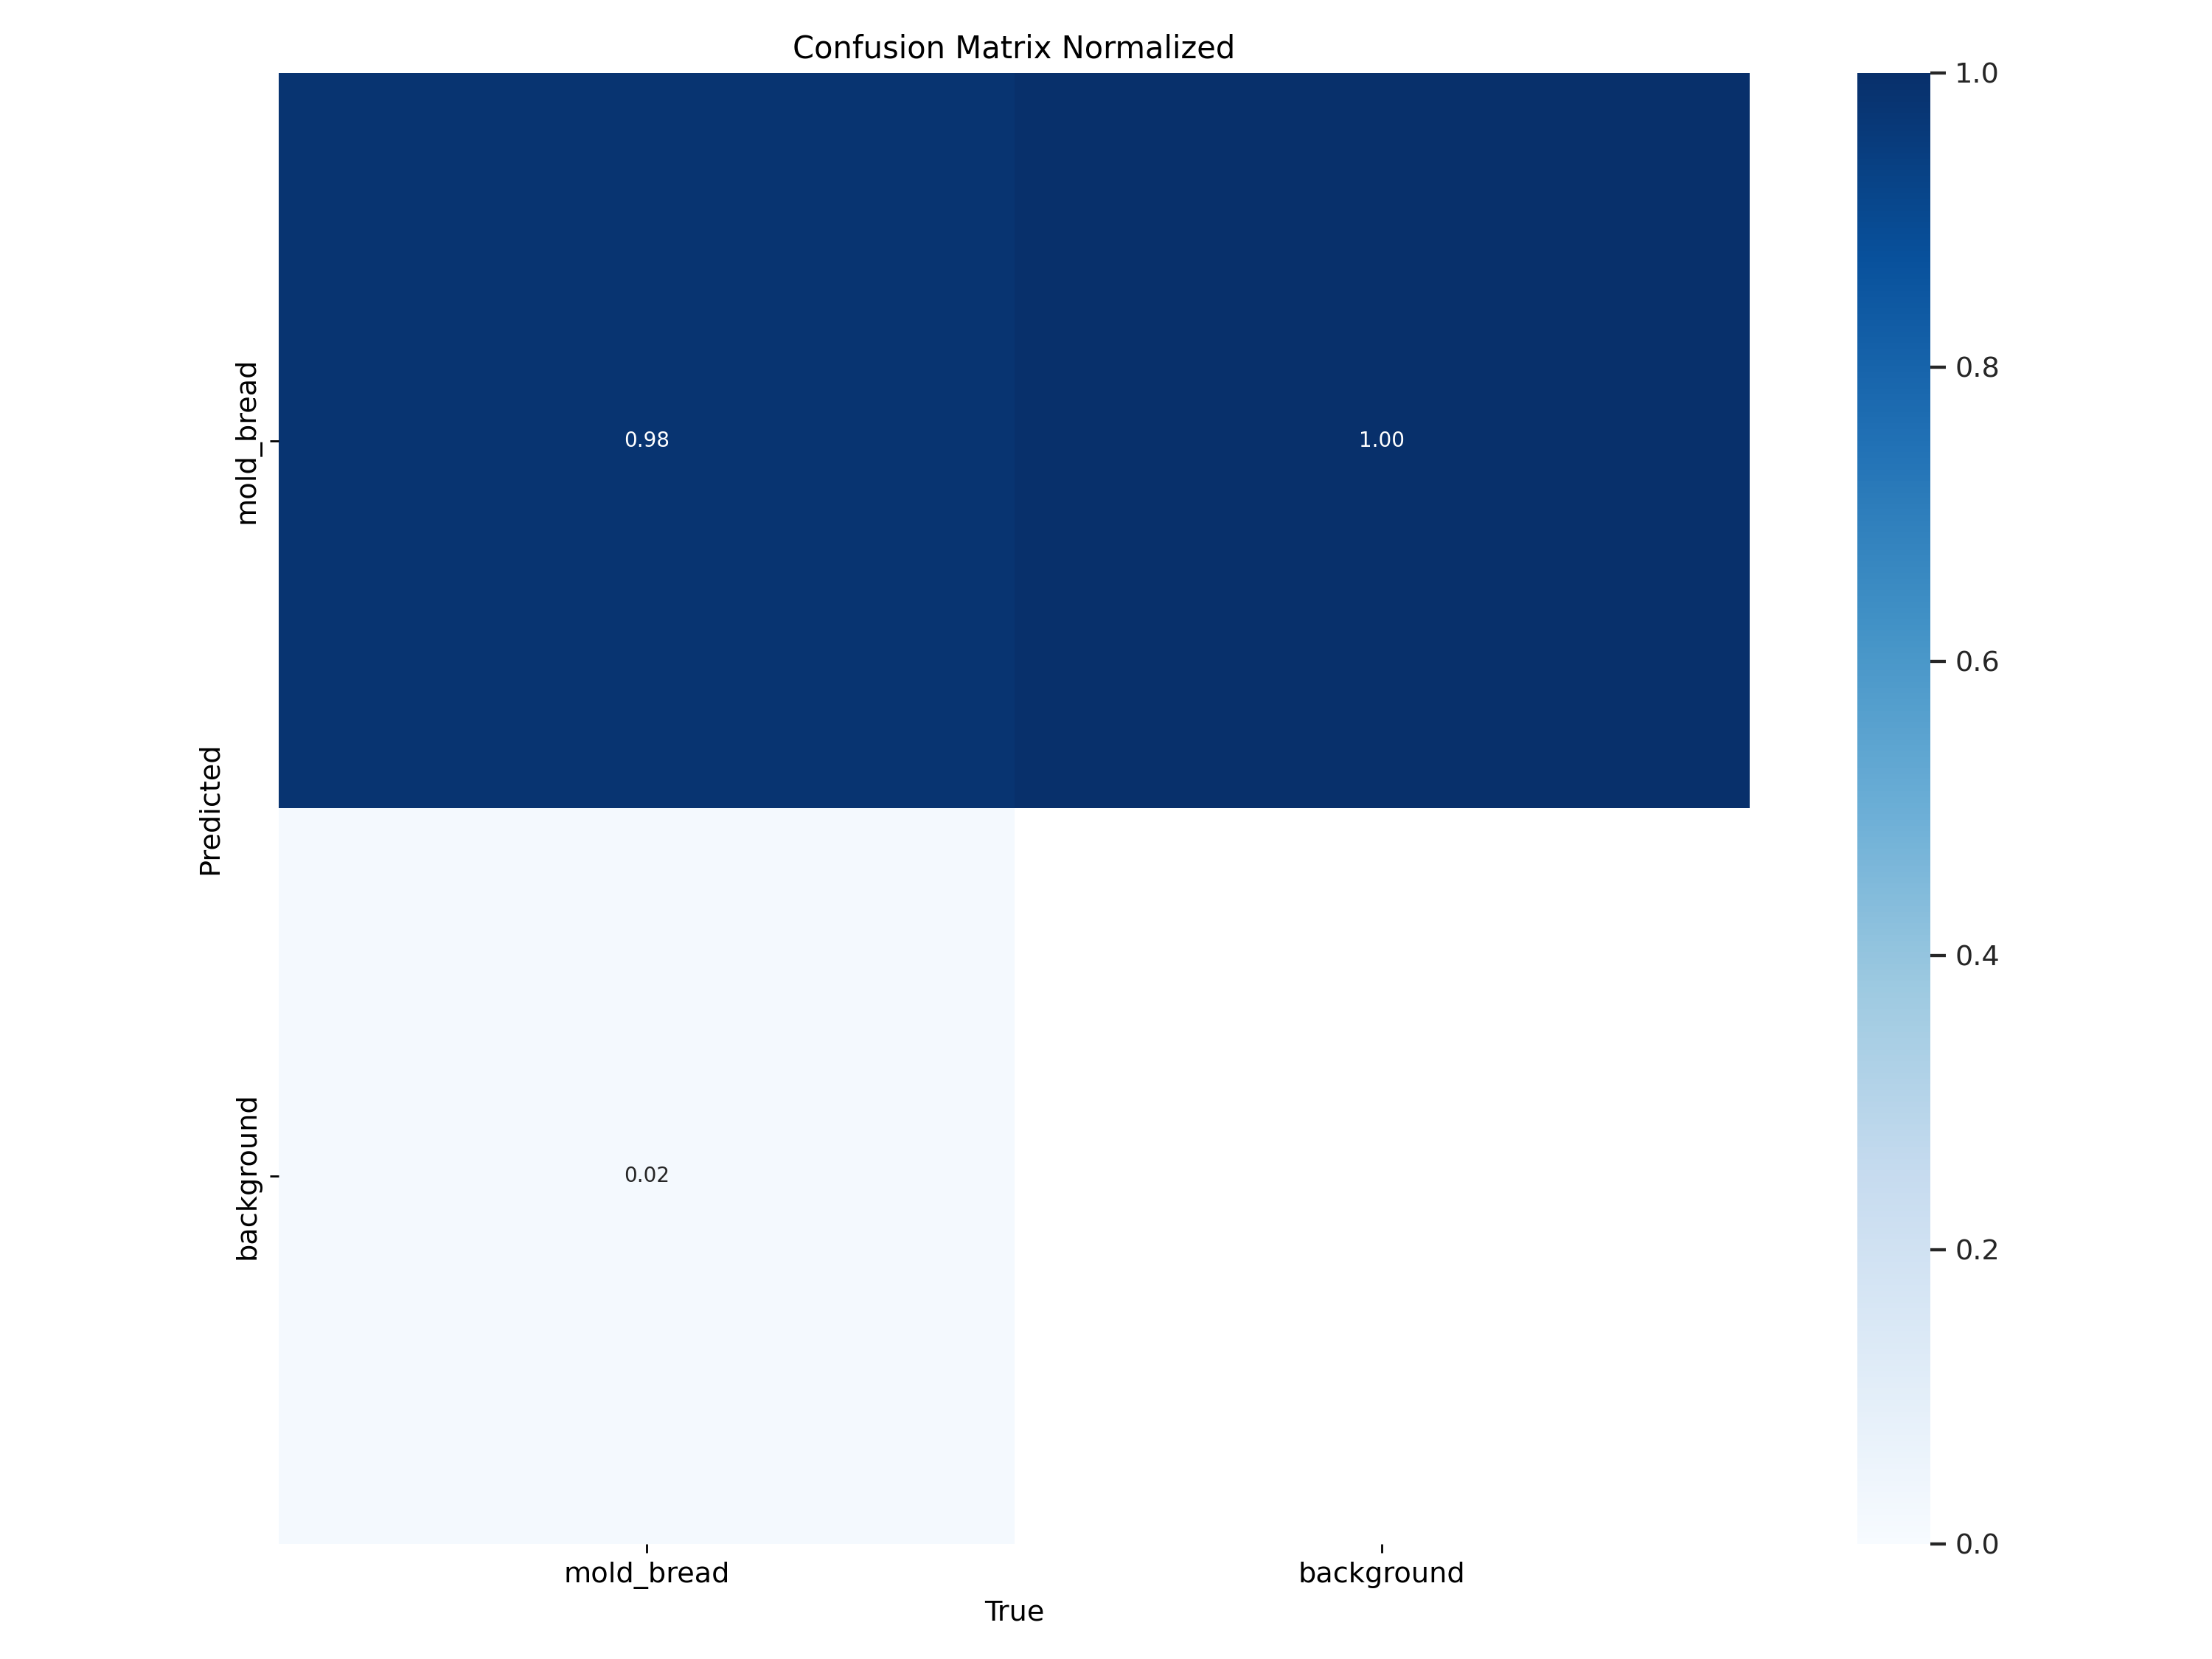

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=600)

/content


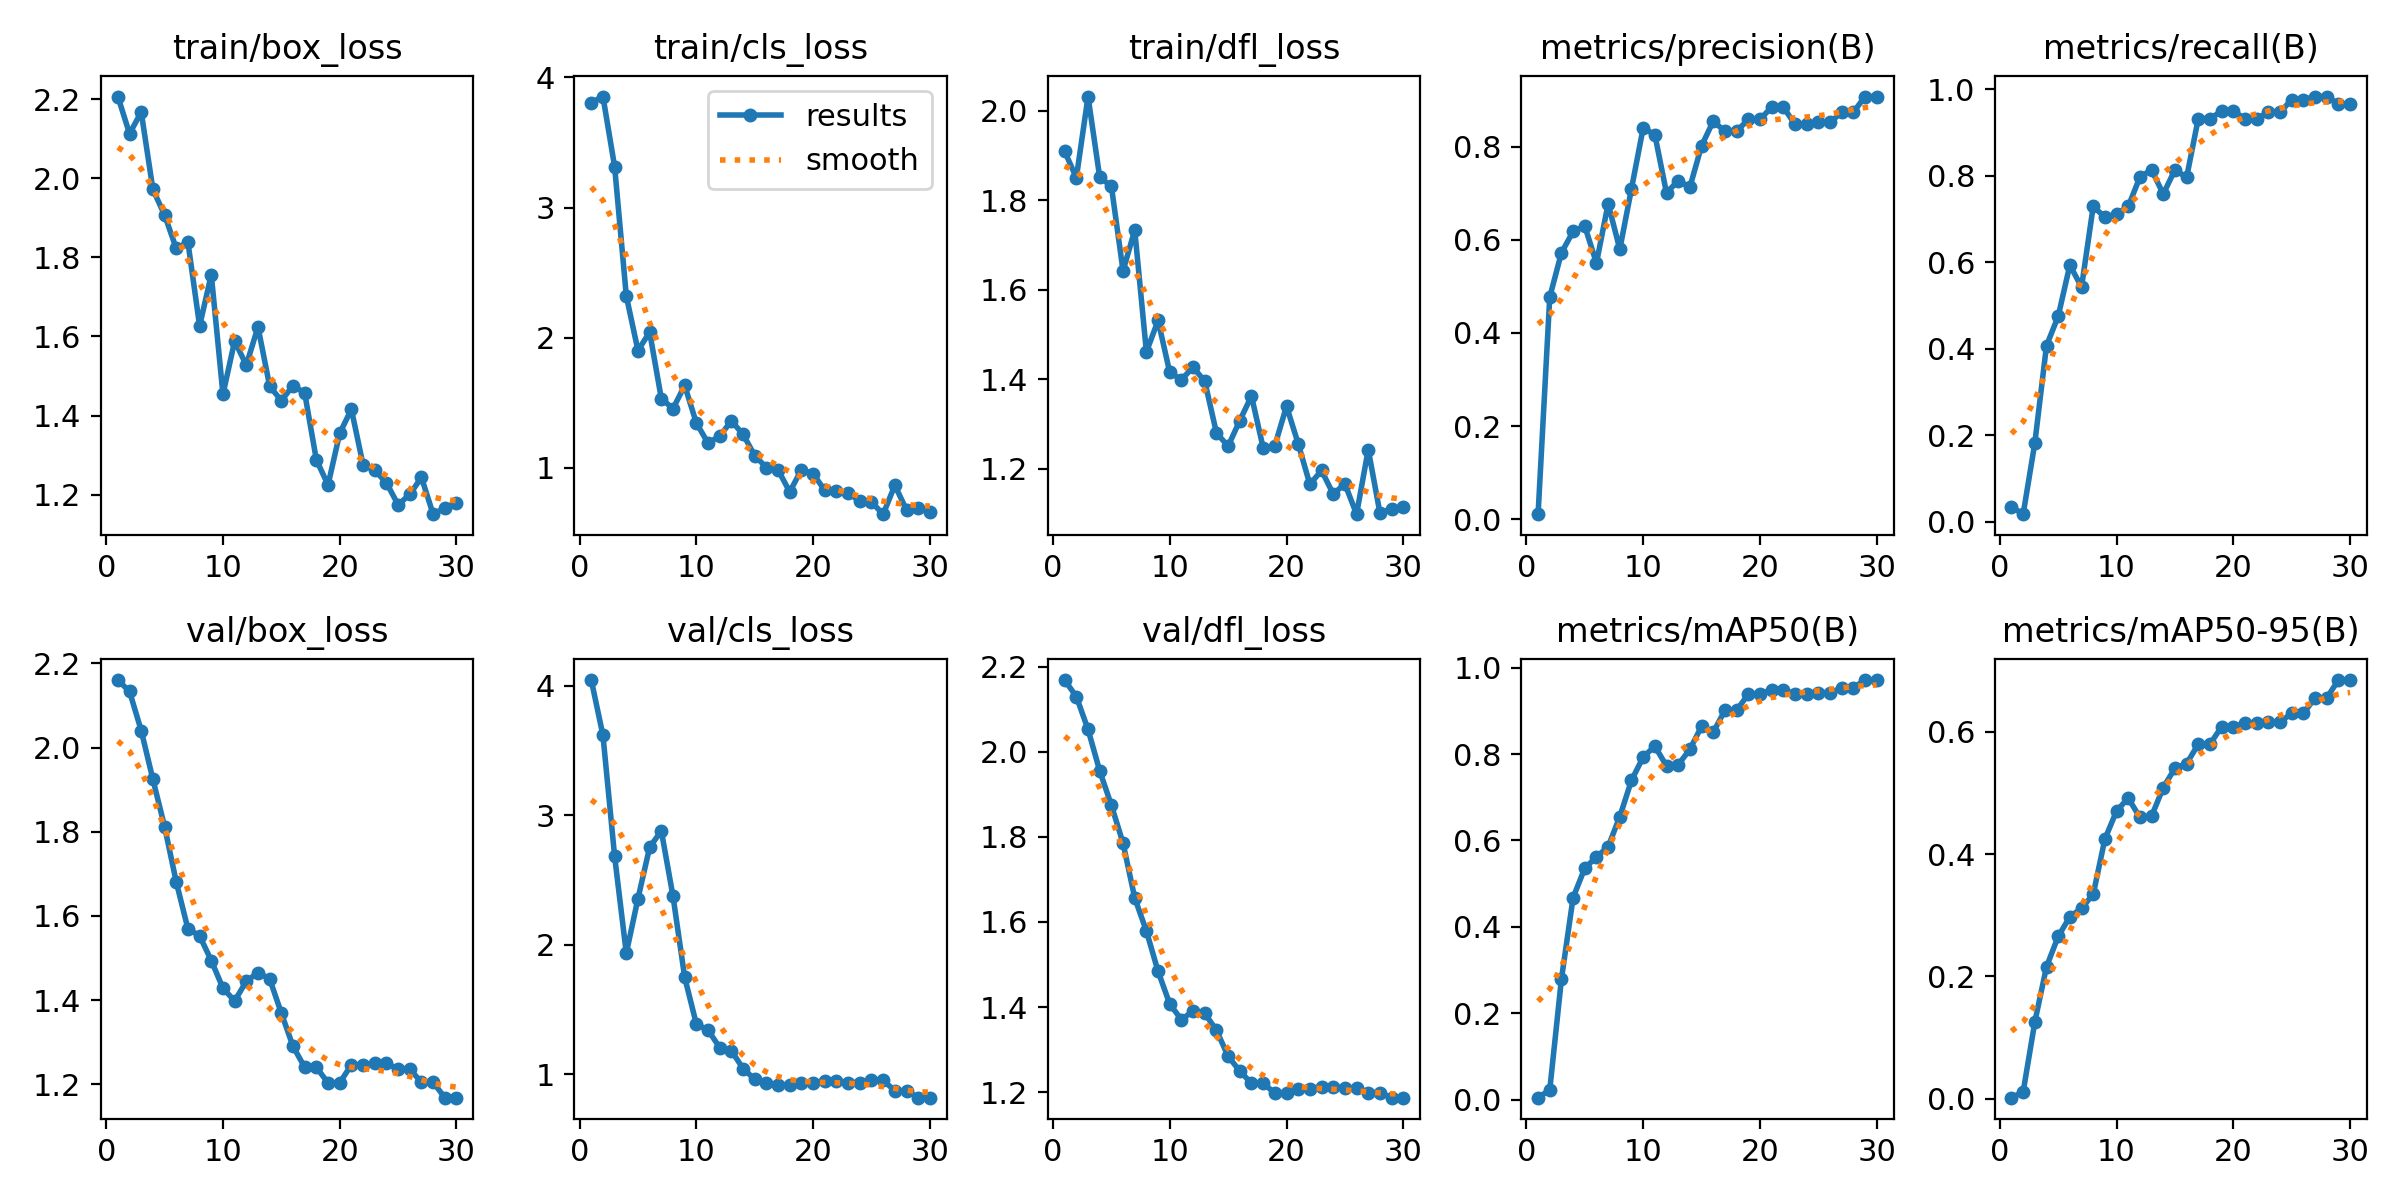

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


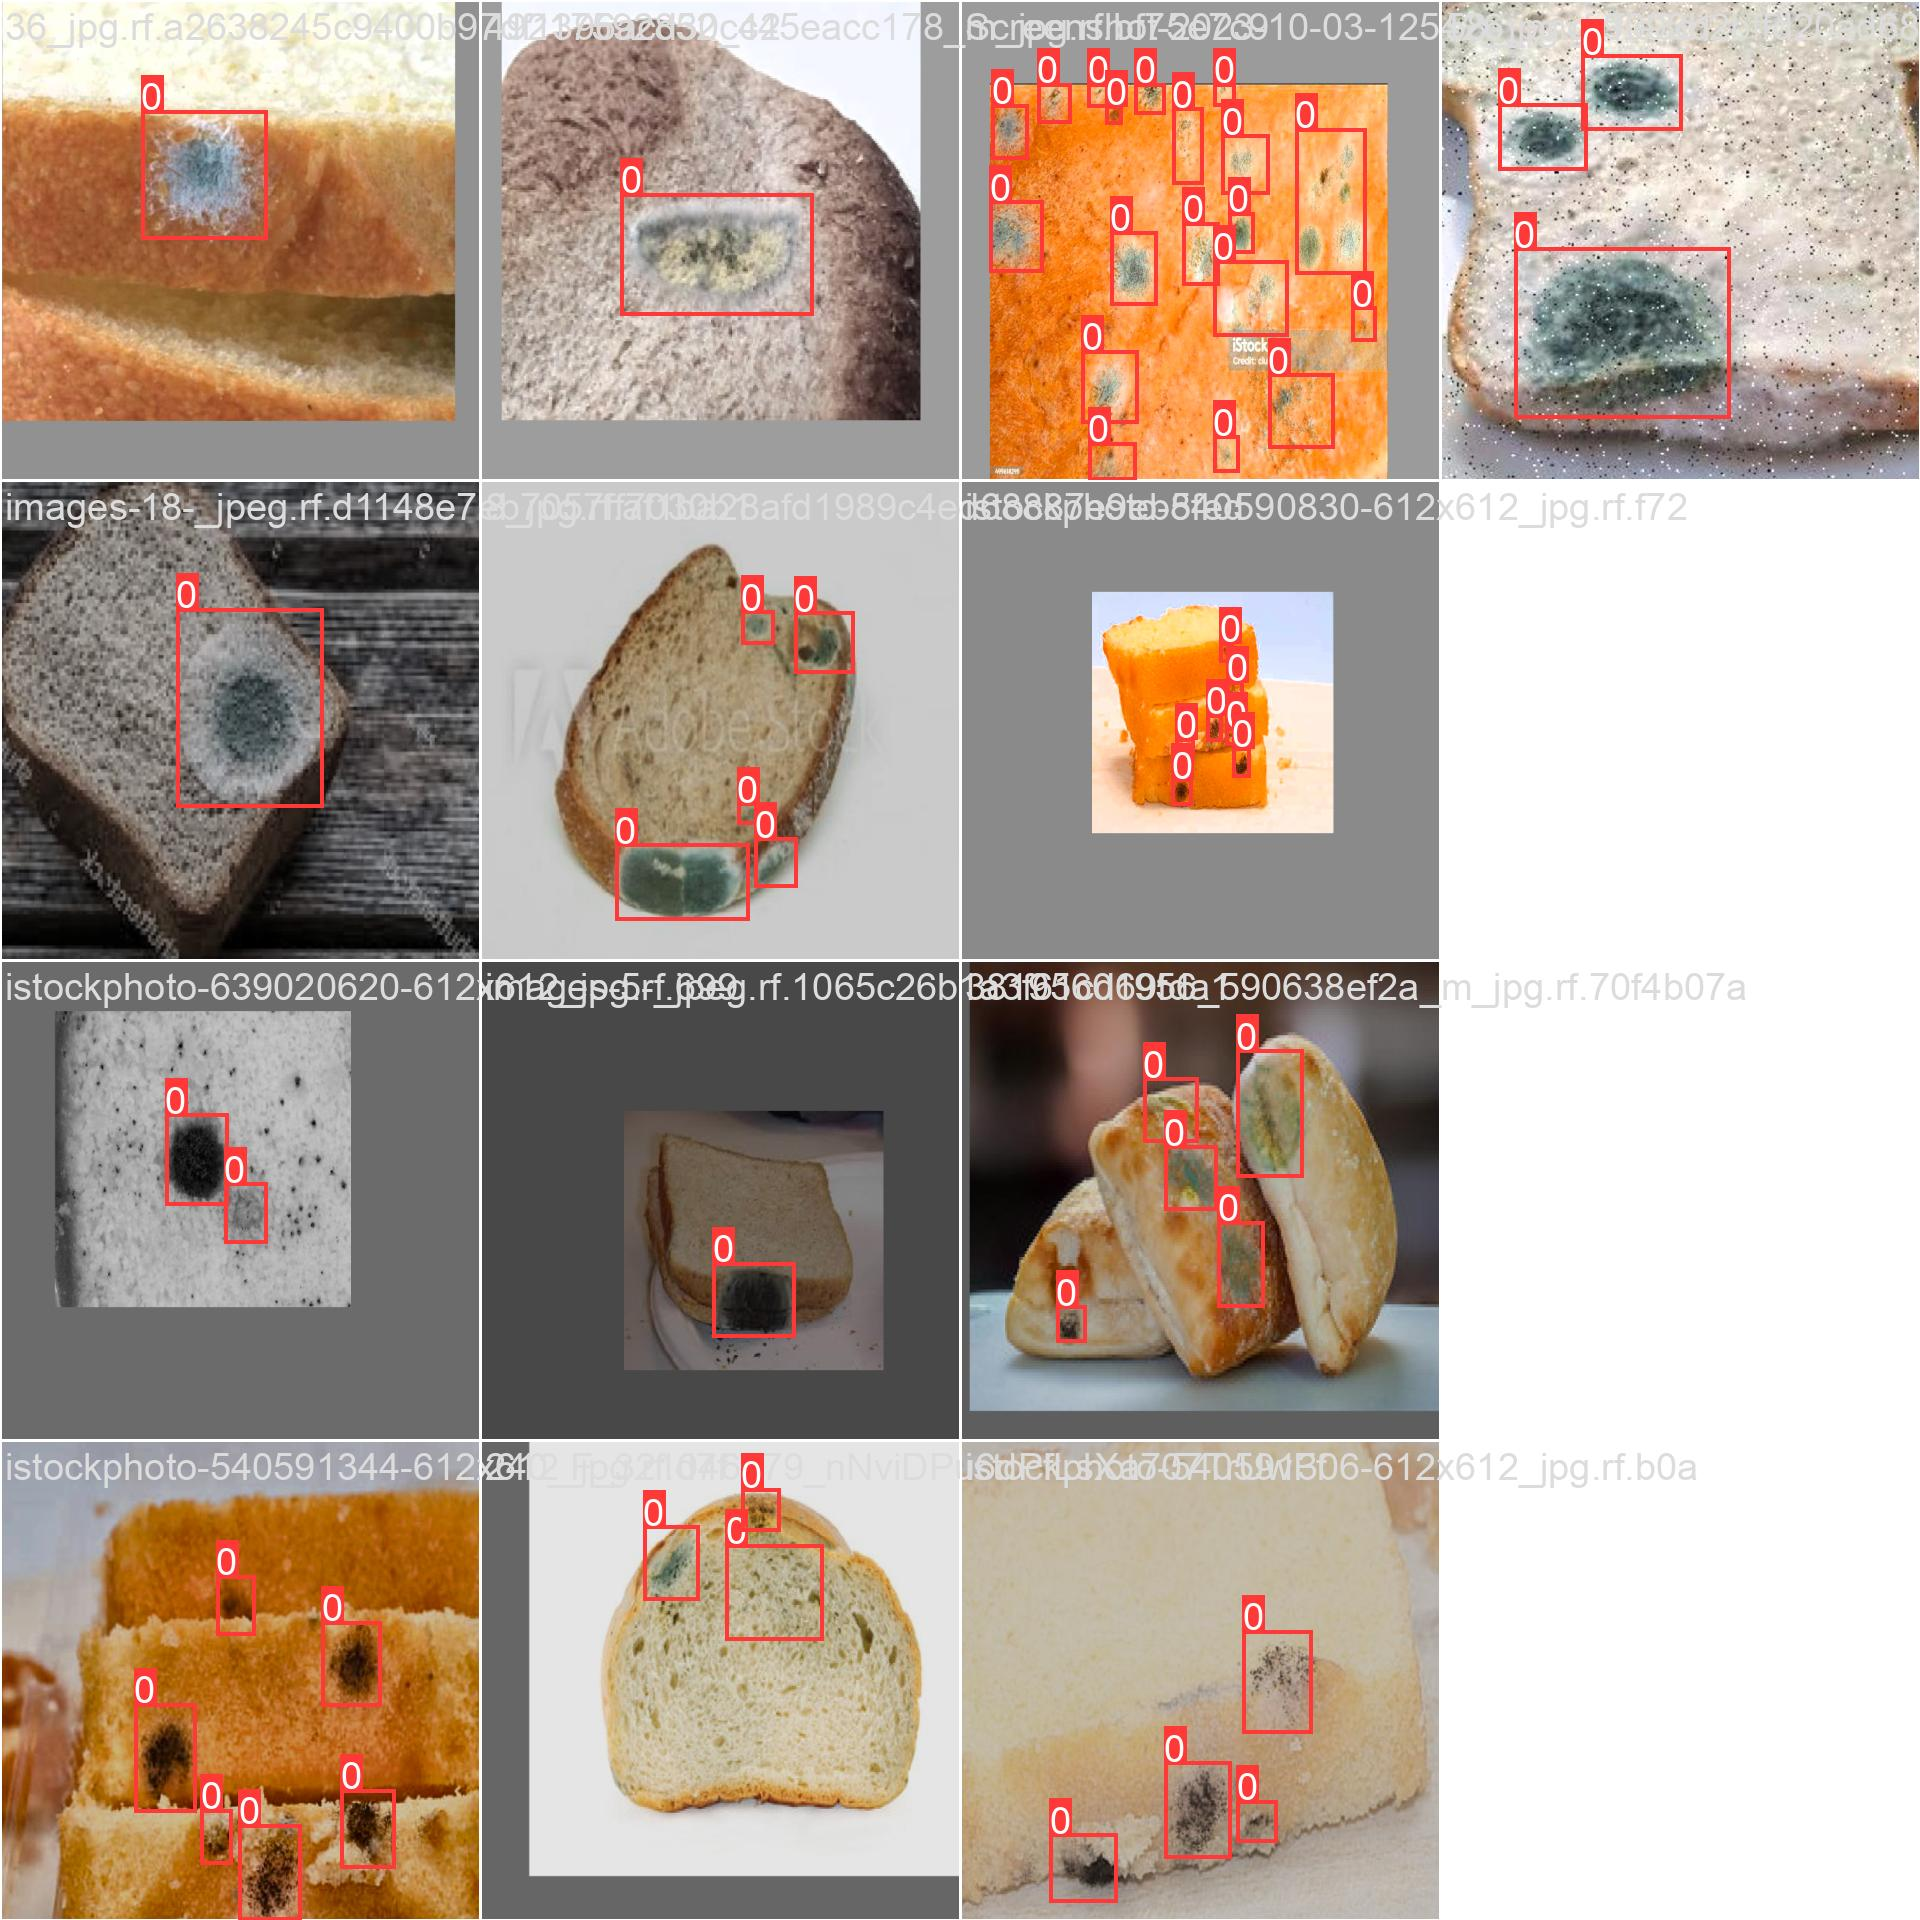

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch20.jpg', width=600)

## Valid Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.193 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/Detection-mold-on-bread--1/test/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100% 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:25<00:00, 25.53s/it]
                   all         13         59      0.908      0.966      0.974       0.68
Speed: 6.5ms preprocess, 1942.8ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


/content


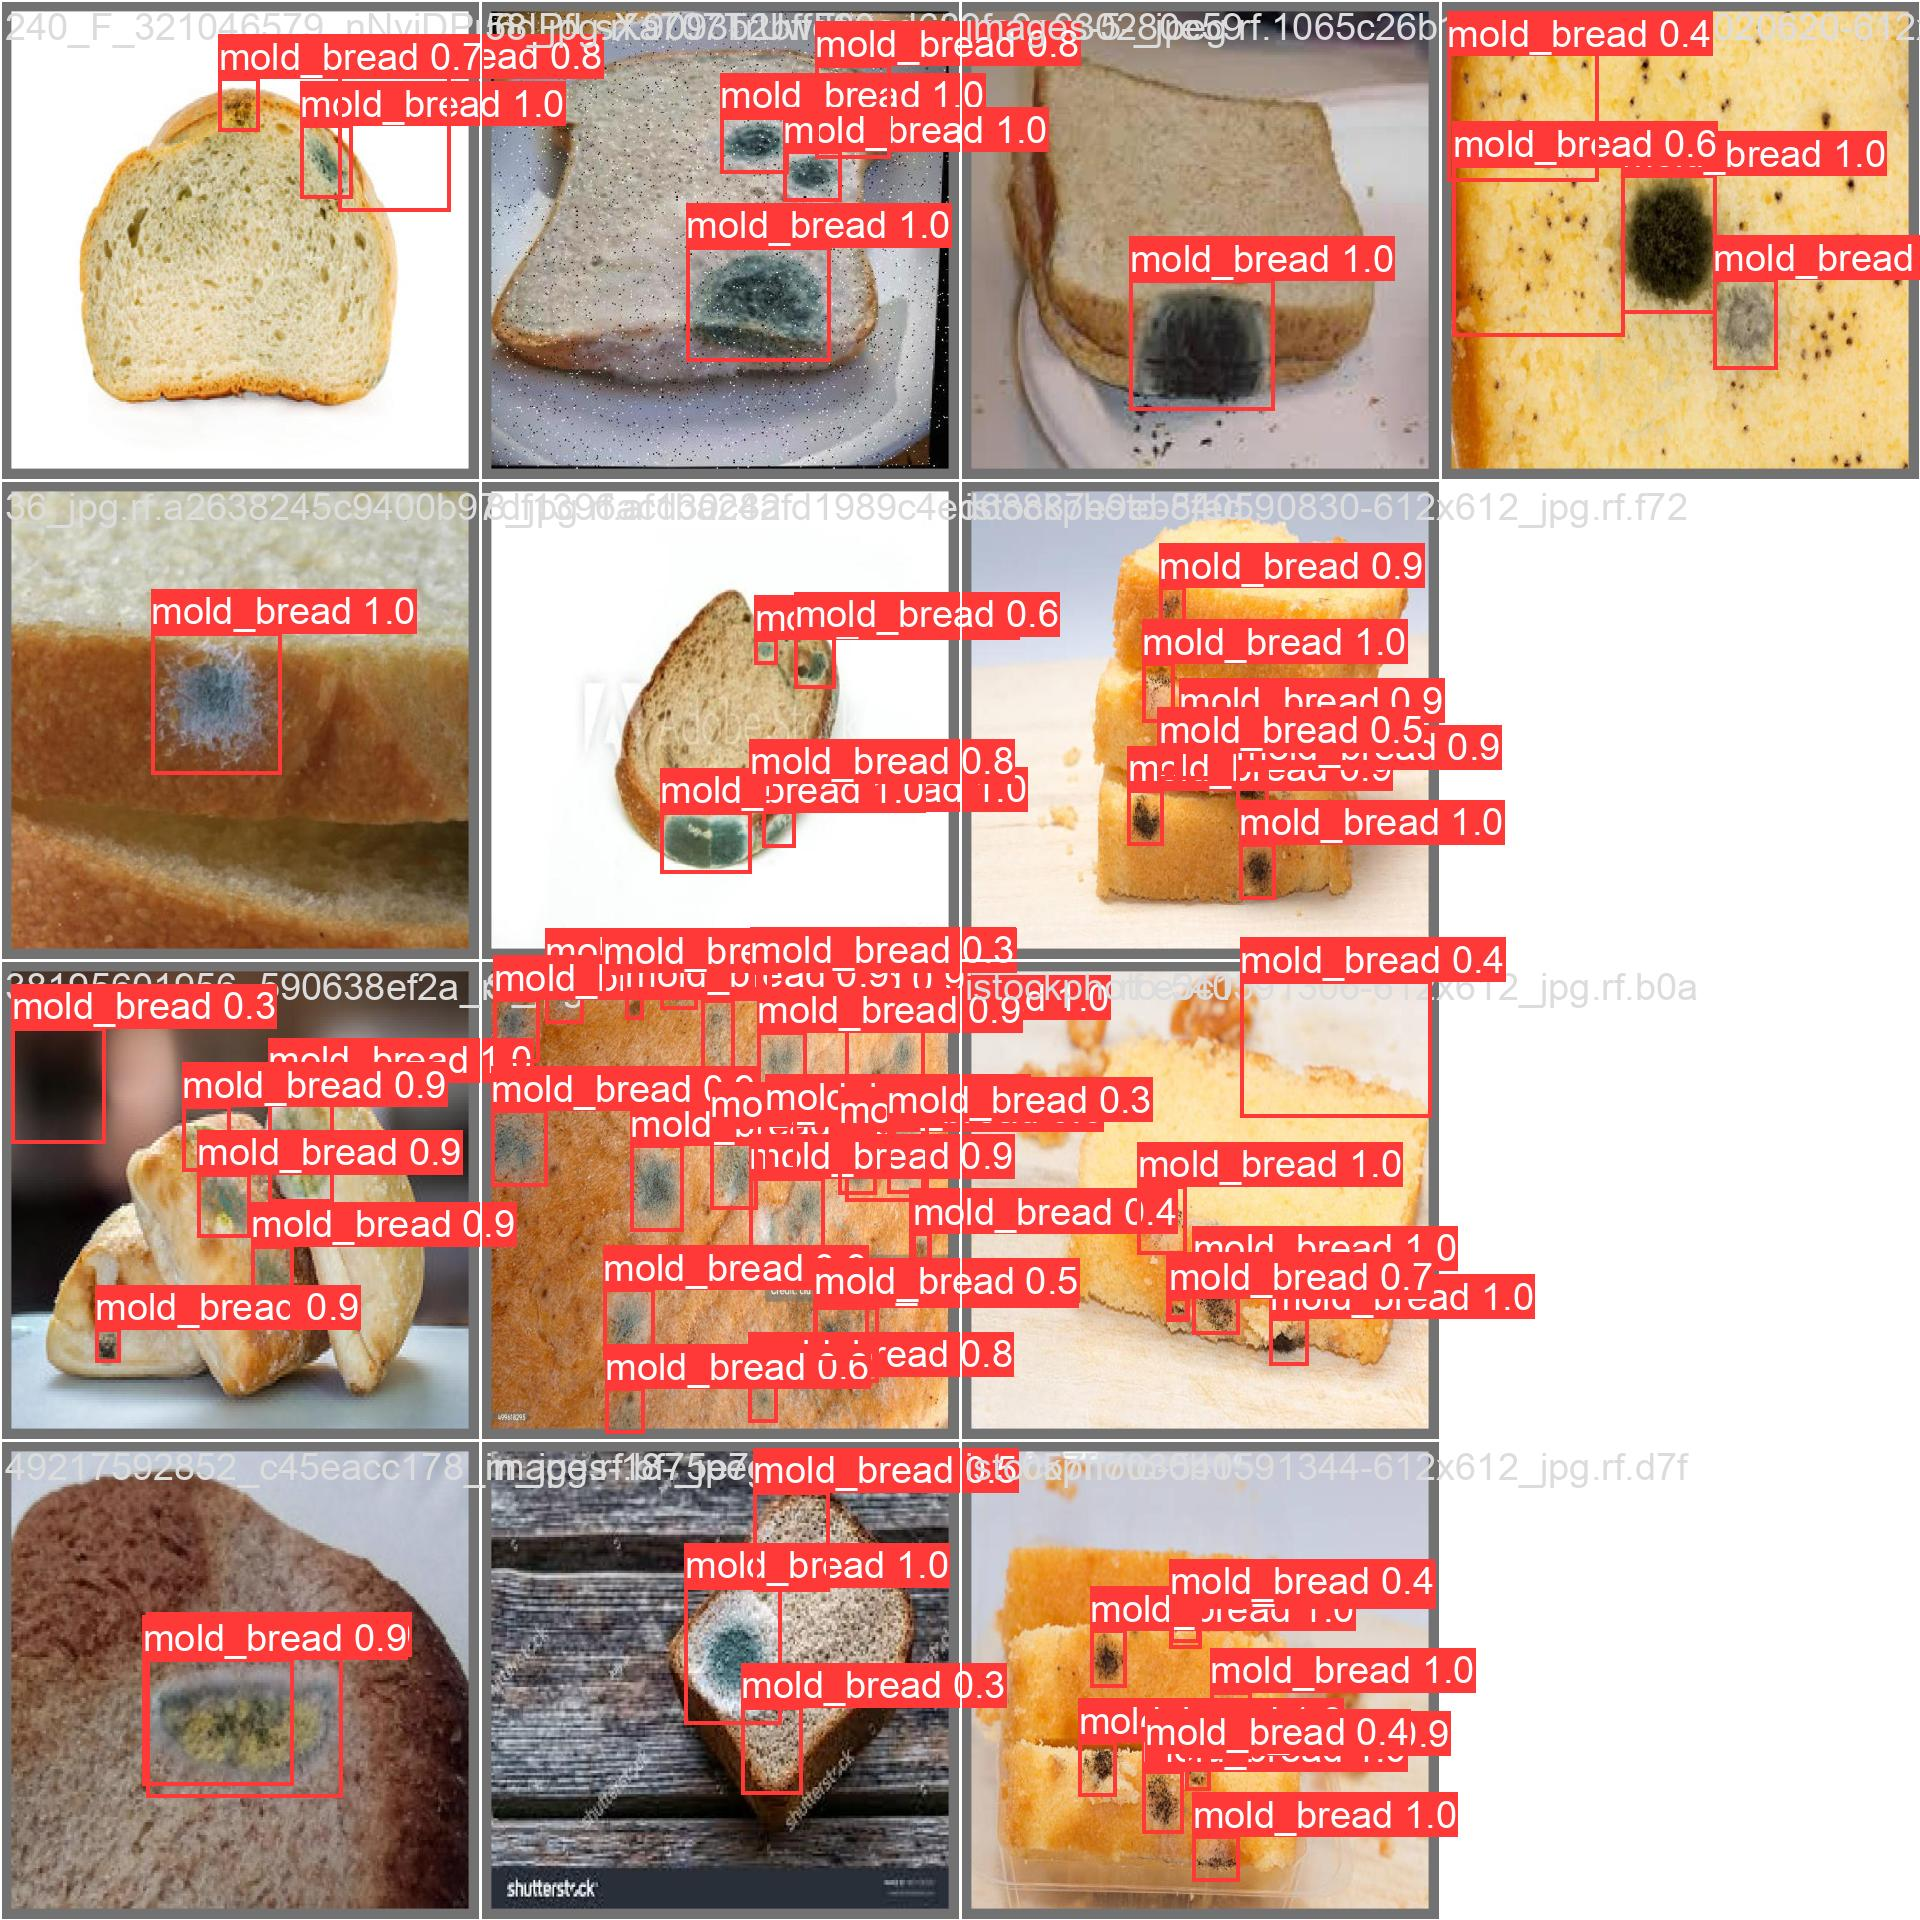

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Inference with Custom Model

Prediction on Test Data,
Perform detection on test dataset

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.193 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/13 /content/datasets/Detection-mold-on-bread--1/test/images/240_F_321046579_nNviDPu6dPfLsXa707TrUwFfgg0AFBMs_jpg.rf.f2e5c7ab3179b638bafc95769a3519d9.jpg: 640x640 2 mold_breads, 1591.1ms
image 2/13 /content/datasets/Detection-mold-on-bread--1/test/images/36_jpg.rf.a2638245c9400b97df1396acd30c4290.jpg: 640x640 1 mold_bread, 1420.0ms
image 3/13 /content/datasets/Detection-mold-on-bread--1/test/images/38195601956_590638ef2a_m_jpg.rf.70f4b07a80a944e6db4b00e952d268bd.jpg: 640x640 5 mold_breads, 1389.6ms
image 4/13 /content/datasets/Detection-mold-on-bread--1/test/images/49217592852_c45eacc178_m_jpg.rf.bf75e7c97625a0a9467dd1ee881c88f0.jpg: 640x640 2 mold_breads, 1417.0ms
image 5/13 /content/datasets/Detection-mold-on-bread--1/test/images/58_jpg.rf.9093b2bffd20ad689fc0e030280e5906.jpg: 640x640 4 mold_breads, 1384

Display Predicted Images

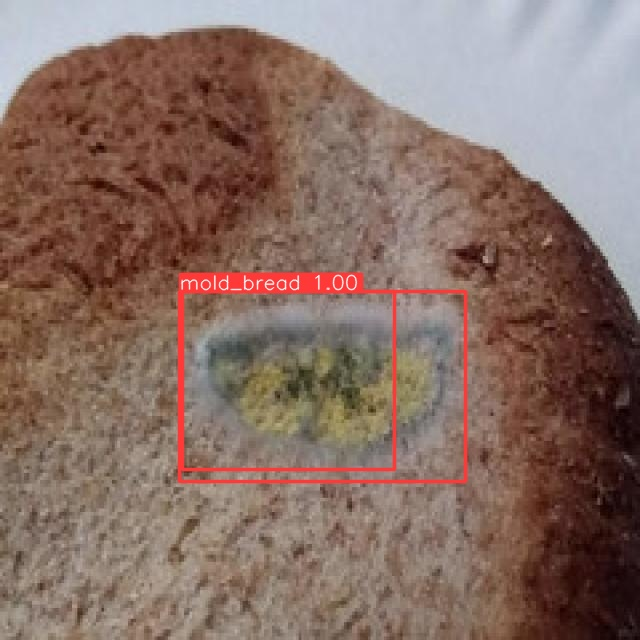

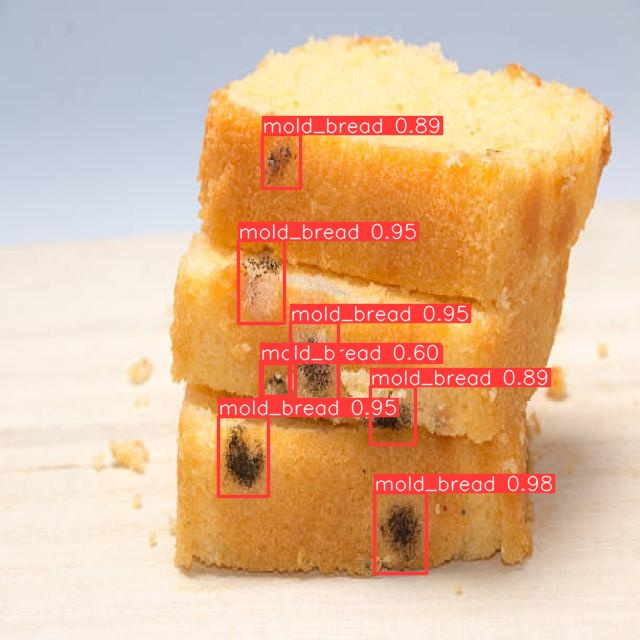

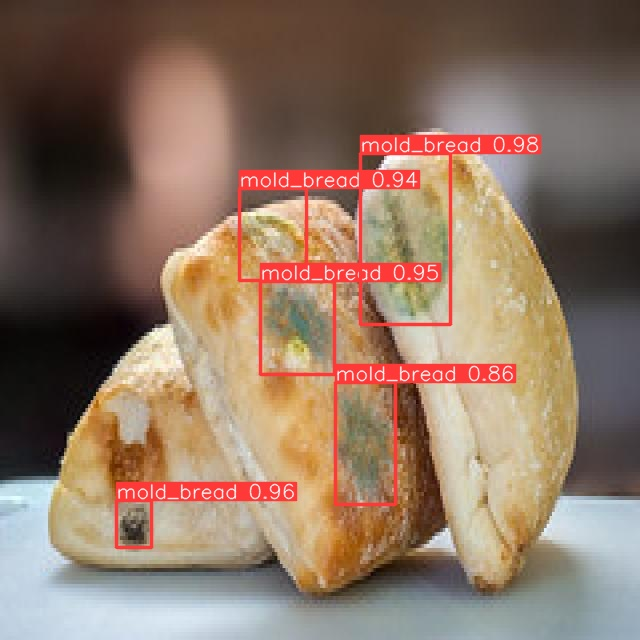

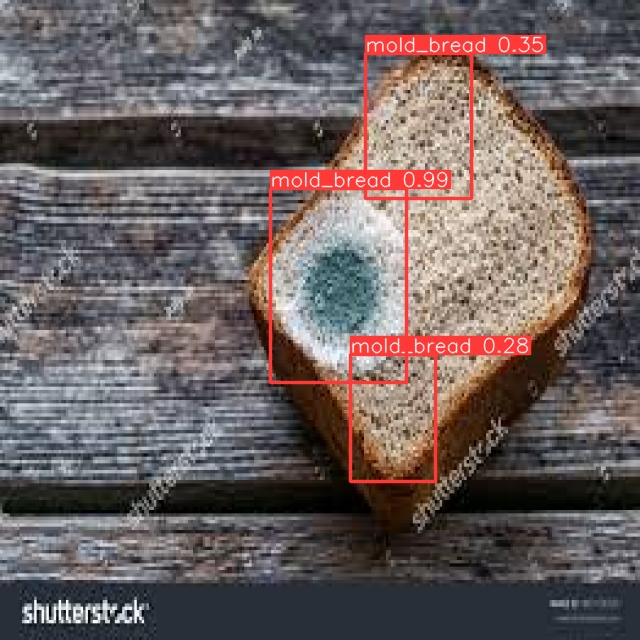

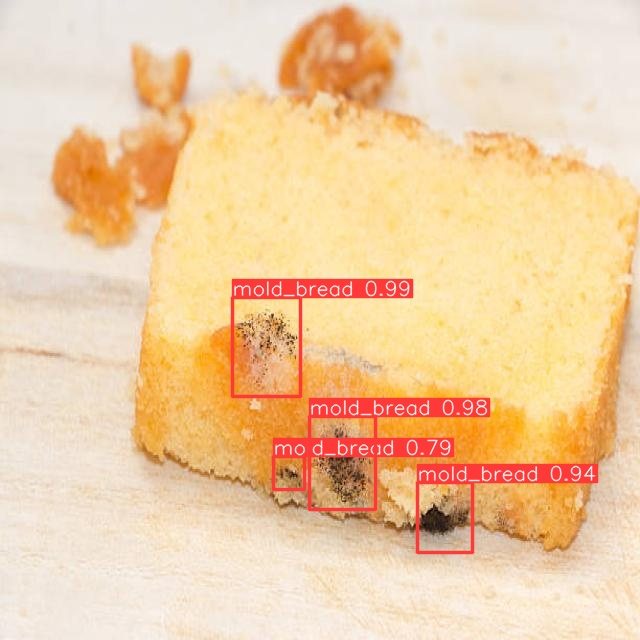

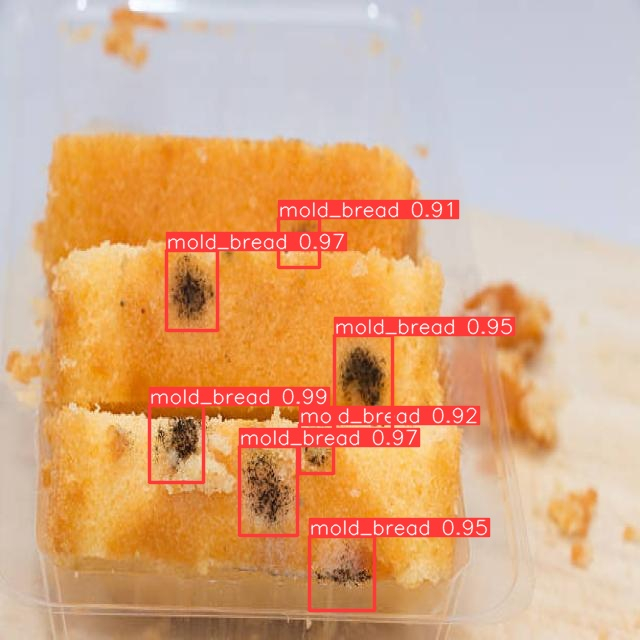

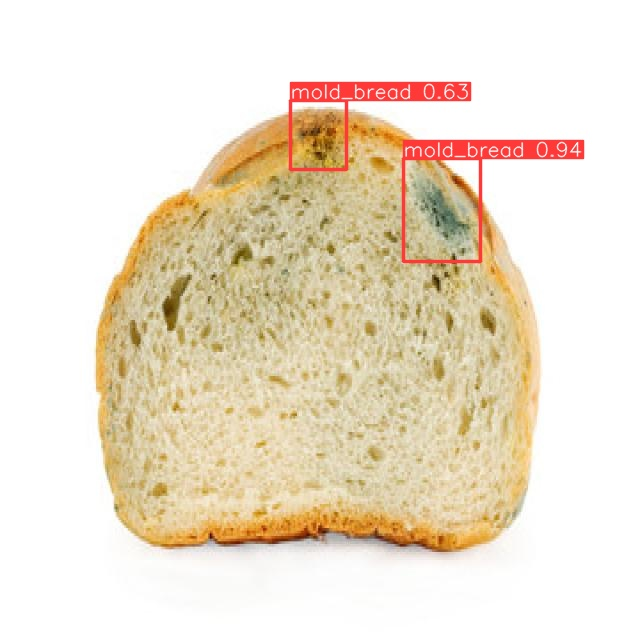

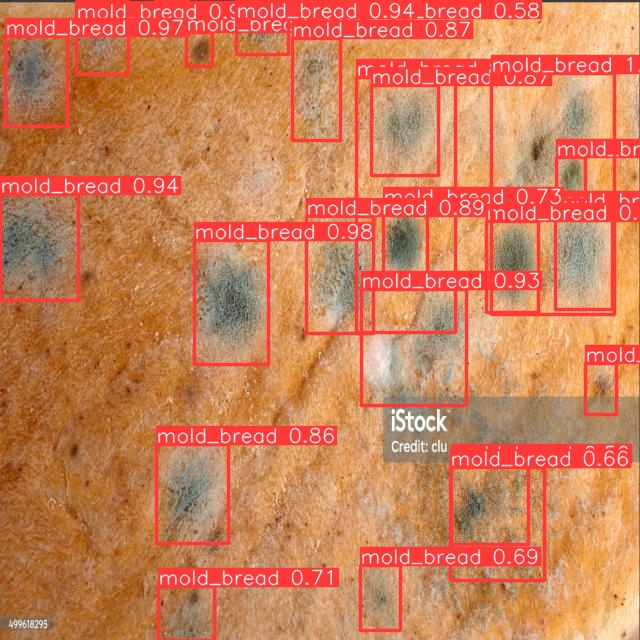

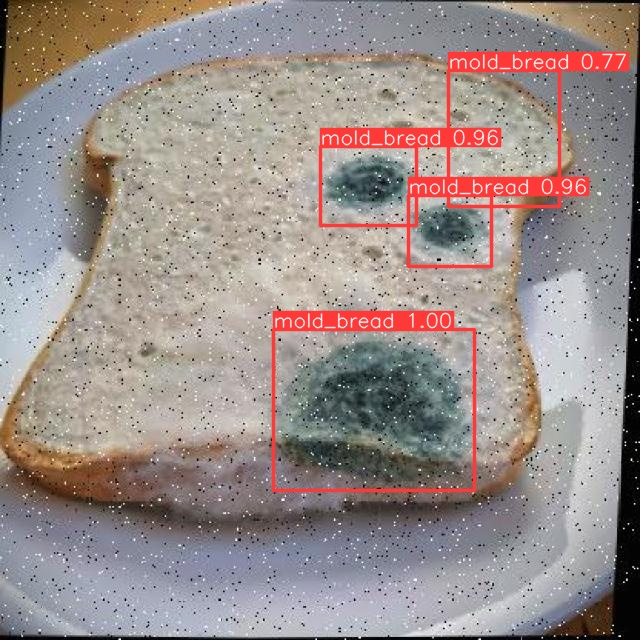

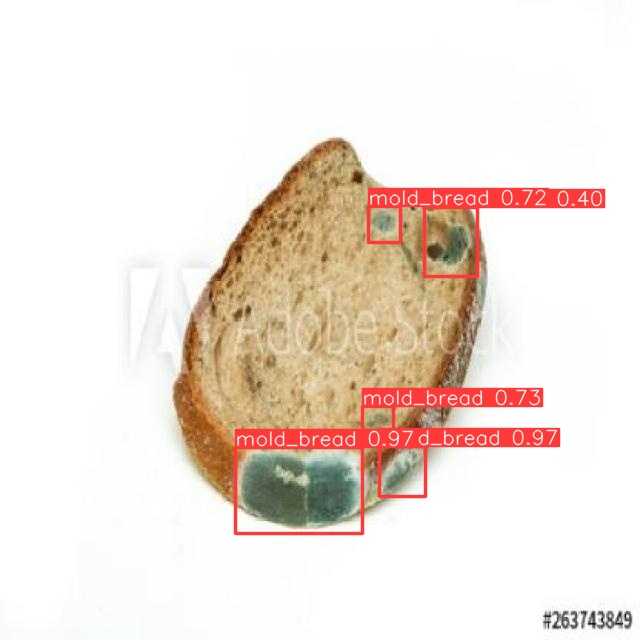

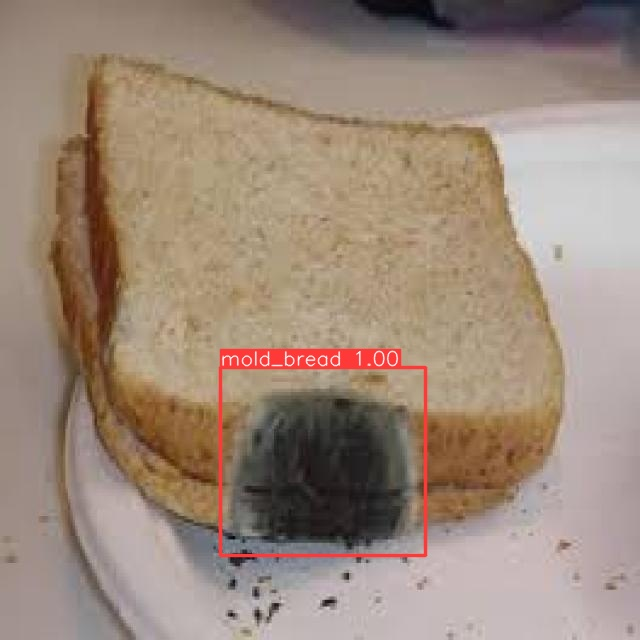

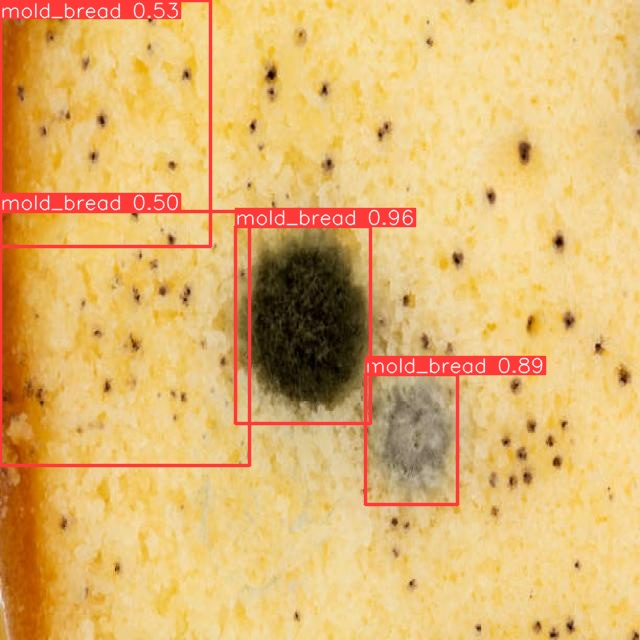

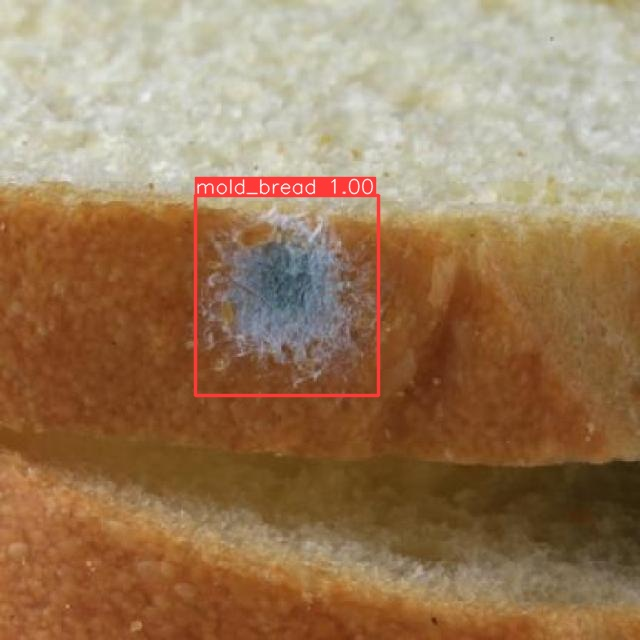

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=400))
      print("\n")